# DEGs UpSet Plots
# Phase 2 vs. Phase 2
using results from [deseq_p2.v.p2.ipynb](https://github.com/jgmcdonough/CE24_RNA-seq/blob/main/analysis/diff_expression/phase2_v_phase2/deseq_p2.v.p2.ipynb) to look for DEGs that are shared/unique among the comparisons

## 0. load libraries

In [5]:
library(ggvenn)
library(tidyverse)
library(UpSetR)

## 1. read CSVs

In [6]:
# get list of files
files <- list.files(
    path = '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/DEGs',
    pattern = '\\.csv$',
    full.names = TRUE
    )

head(files)

[1] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/DEGs/DEG_bb_cc.csv"
[2] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/DEGs/DEG_bc_bb.csv"
[3] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/DEGs/DEG_bc_cb.csv"
[4] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/DEGs/DEG_bc_cc.csv"
[5] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/DEGs/DEG_bc_hc.csv"
[6] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/DEGs/DEG_bc_wc.csv"

In [7]:
names(files) <- gsub("^DEG_", "", tools::file_path_sans_ext(basename(files)))
deg_list <- lapply(files, read.csv)
names(deg_list)

[1] "bb_cc" "bc_bb" "bc_cb" "bc_cc" "bc_hc" "bc_wc" "bh_hh" "bw_ww" "cb_bb"
[10] "cb_bc" "cb_cc" "cb_ch" "cb_cw" "ch_cc" "ch_hc" "cw_cc" "cw_ch" "cw_wc"
[19] "hb_bb" "hb_bh" "hb_cb" "hc_cc" "hc_ch" "hc_hh" "hh_cc" "hh_ch" "wb_bb"
[28] "wb_bw" "wb_cb" "wc_cc" "wc_cw" "wc_hc" "wc_ww" "wh_hw" "ww_cc" "ww_cw"

## 2. UpSet plots *within* comparison groups

### 1. Effect of single exposure after period of recovery

In [5]:
# make list of dfs
comp1 = list(WC_v_CC = deg_list$wc_cc$X,
         HC_v_CC = deg_list$hc_cc$X,
         BC_v_CC = deg_list$bc_cc$X)

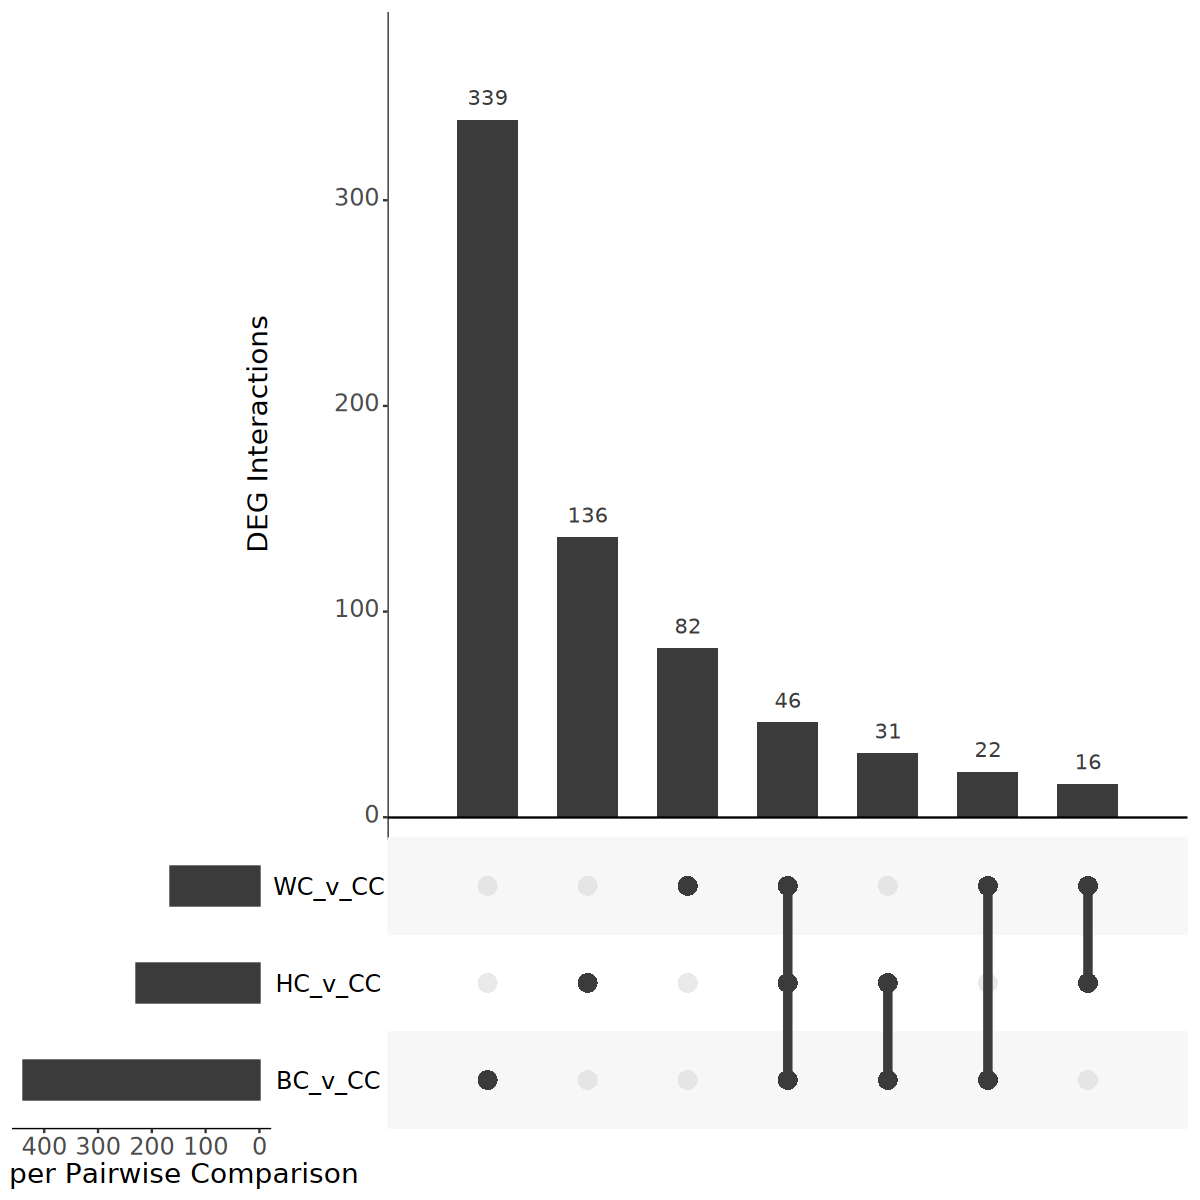

In [7]:
options(repr.plot.width=10, repr.plot.height=10)

comp1.upset <- upset(fromList(comp1), nsets = 6,, order.by='freq', point.size = 5, line.size = 2, 
    mainbar.y.label = "DEG Interactions", sets.x.label = "DEGs per Pairwise Comparison", 
    text.scale = c(2, 2, 2, 2, 2, 2))

comp1.upset

Majority of DEGs are not shared between these comparisons, but we do see that 46 genes are shared in all three - general stress response genes? 

### 2. Effect of single late exposure

In [8]:
# make list of dfs
comp2 = list(CW_v_CC = deg_list$cw_cc$X,
         CH_v_CC = deg_list$ch_cc$X,
         CB_v_CC = deg_list$cb_cc$X)

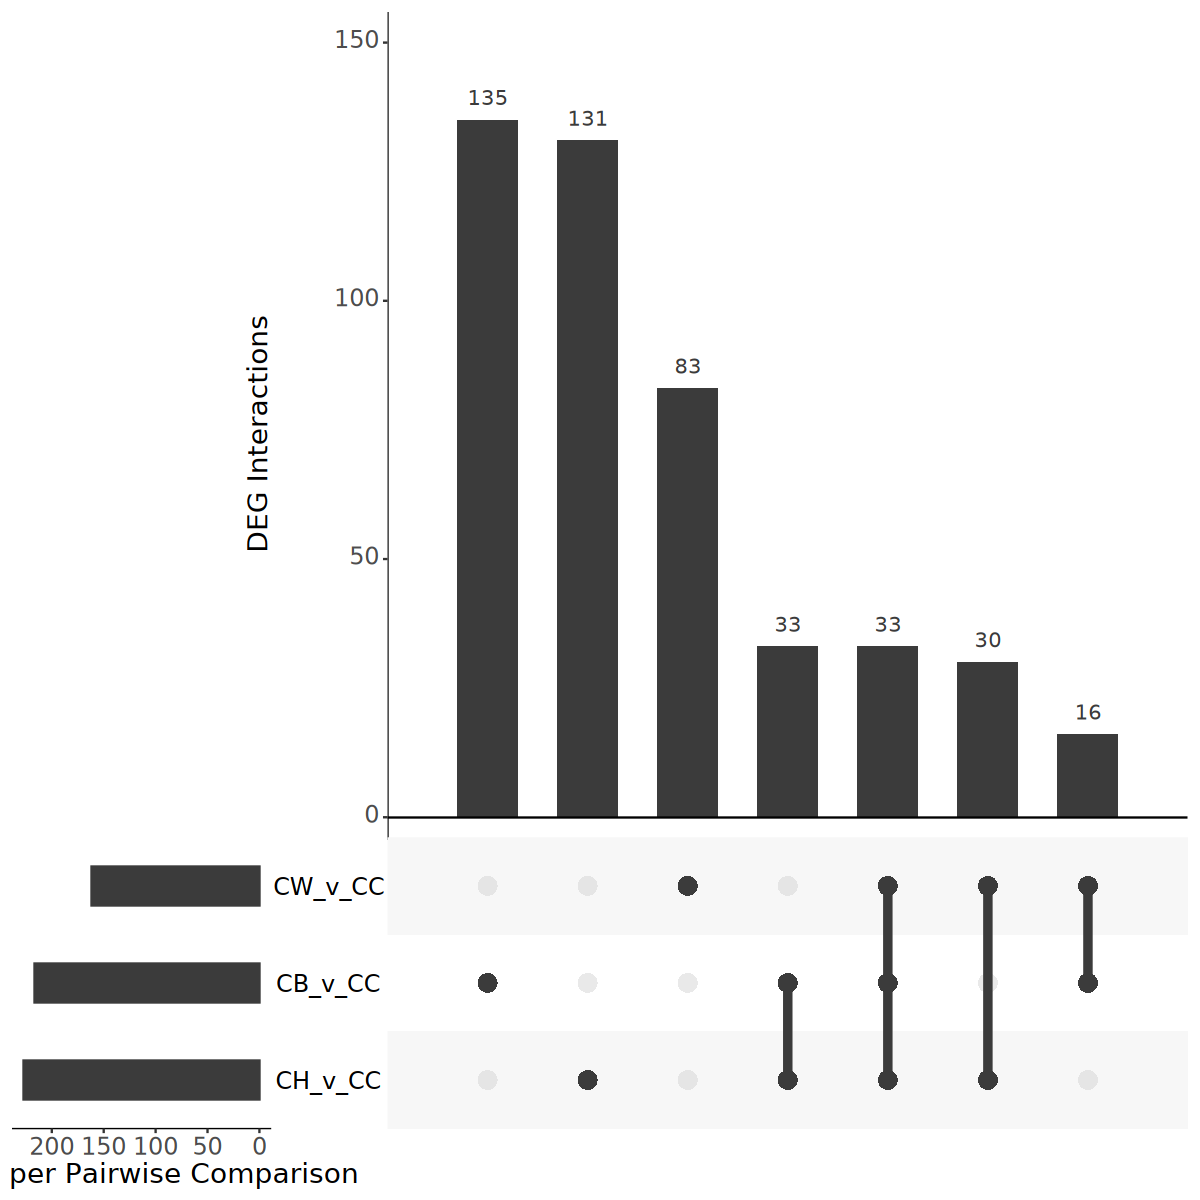

In [9]:
options(repr.plot.width=10, repr.plot.height=10)

comp2.upset <- upset(fromList(comp2), nsets = 6,, order.by='freq', point.size = 5, line.size = 2, 
    mainbar.y.label = "DEG Interactions", sets.x.label = "DEGs per Pairwise Comparison", 
    text.scale = c(2, 2, 2, 2, 2, 2))

comp2.upset

#### Comparison 2 and 3 together

In [10]:
# make list of dfs
comp1_2 = list(WC_v_CC = deg_list$wc_cc$X,
         HC_v_CC = deg_list$hc_cc$X,
         BC_v_CC = deg_list$bc_cc$X,
             CW_v_CC = deg_list$cw_cc$X,
         CH_v_CC = deg_list$ch_cc$X,
         CB_v_CC = deg_list$cb_cc$X)

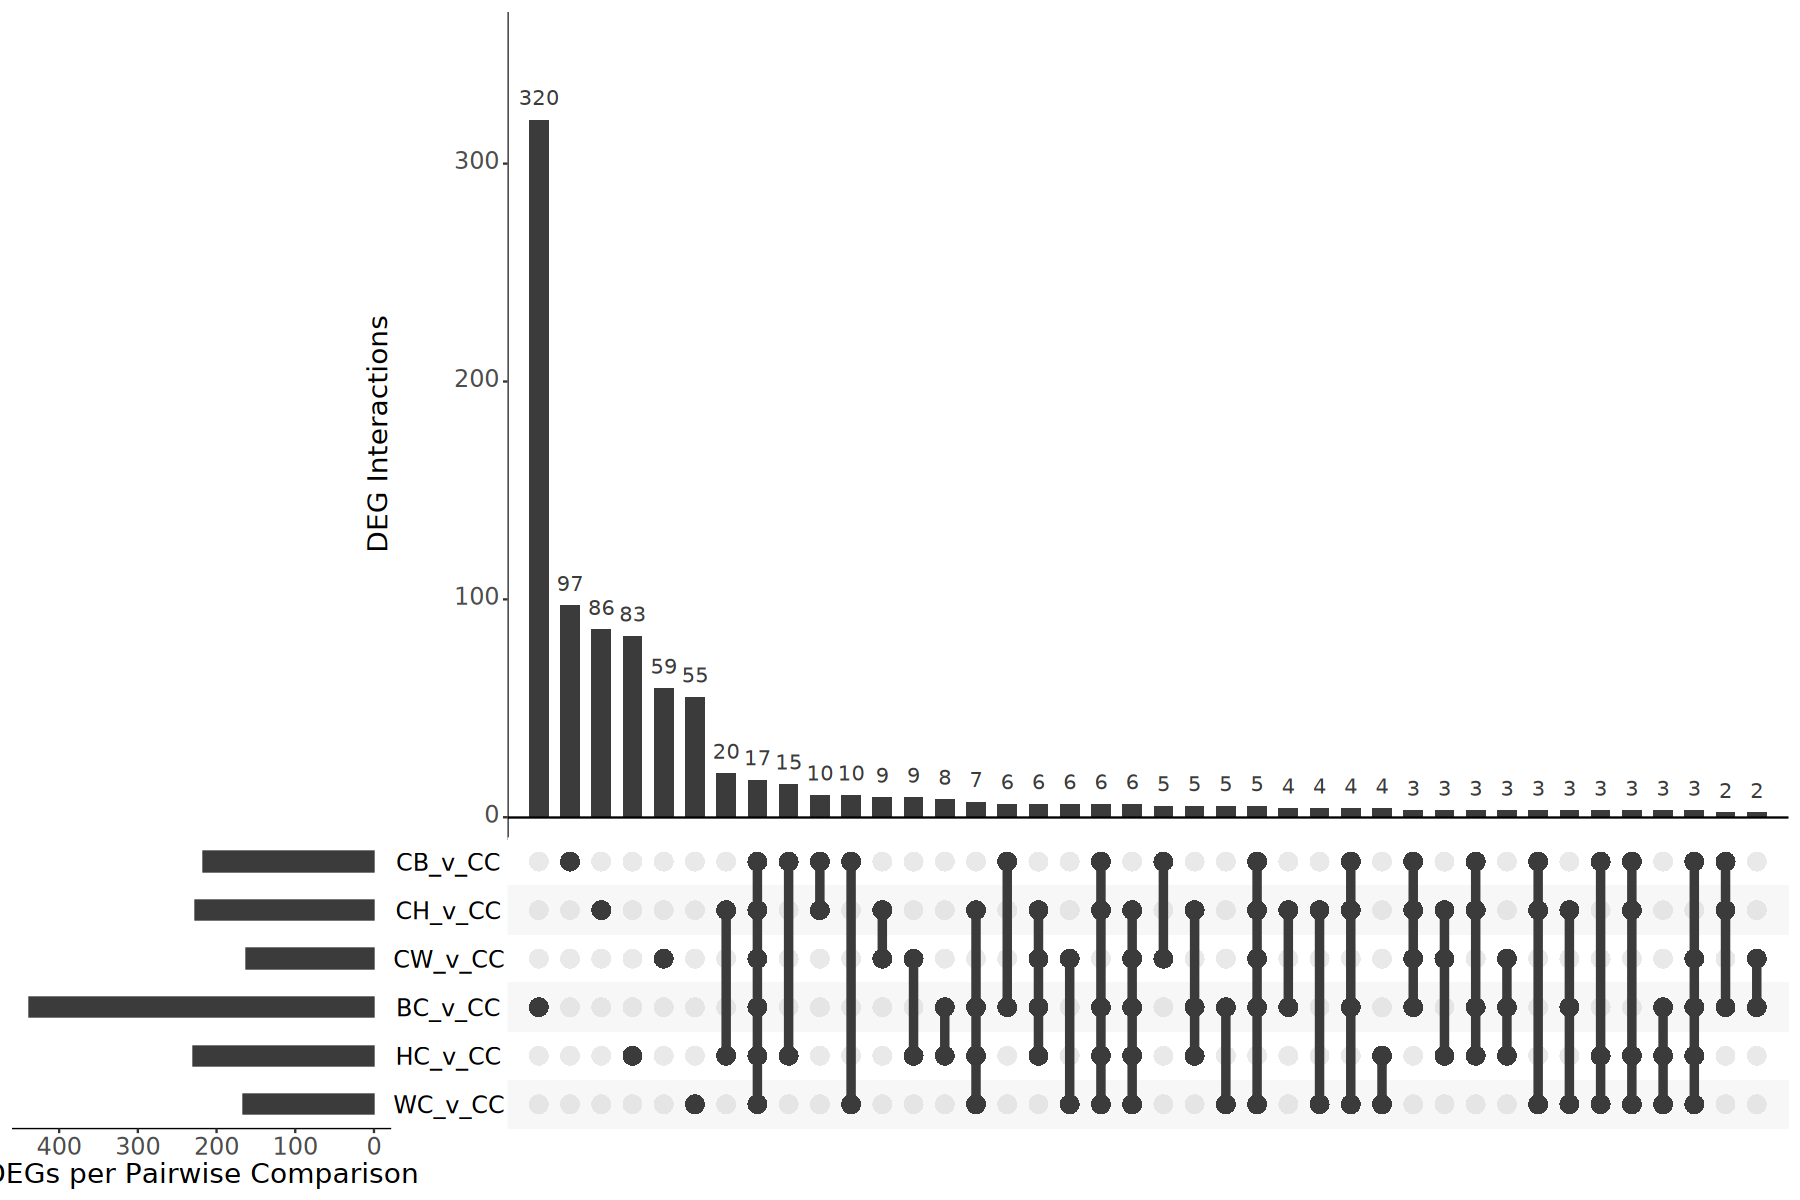

In [14]:
options(repr.plot.width=15, repr.plot.height=10)

comp1_2.upset <- upset(fromList(comp1_2), nsets = 6,, order.by='freq', point.size = 5, line.size = 2, keep.order=TRUE,
                       sets = c('WC_v_CC',
                                'HC_v_CC',
                                'BC_v_CC',
                                'CW_v_CC',
                                'CH_v_CC',
                                'CB_v_CC'),
    mainbar.y.label = "DEG Interactions", sets.x.label = "DEGs per Pairwise Comparison", 
    text.scale = c(2, 2, 2, 2, 2, 2))

comp1_2.upset

### 3. Effect of timing of initial stress exposure

I don't think it makes sense to look at the overlap for this comparison - skipping

### 4. No stress vs. most stress

In [17]:
# make list of dfs
comp4 = list(WW_v_CC = deg_list$ww_cc$X,
         HH_v_CC = deg_list$hh_cc$X,
         BB_v_CC = deg_list$bb_cc$X)

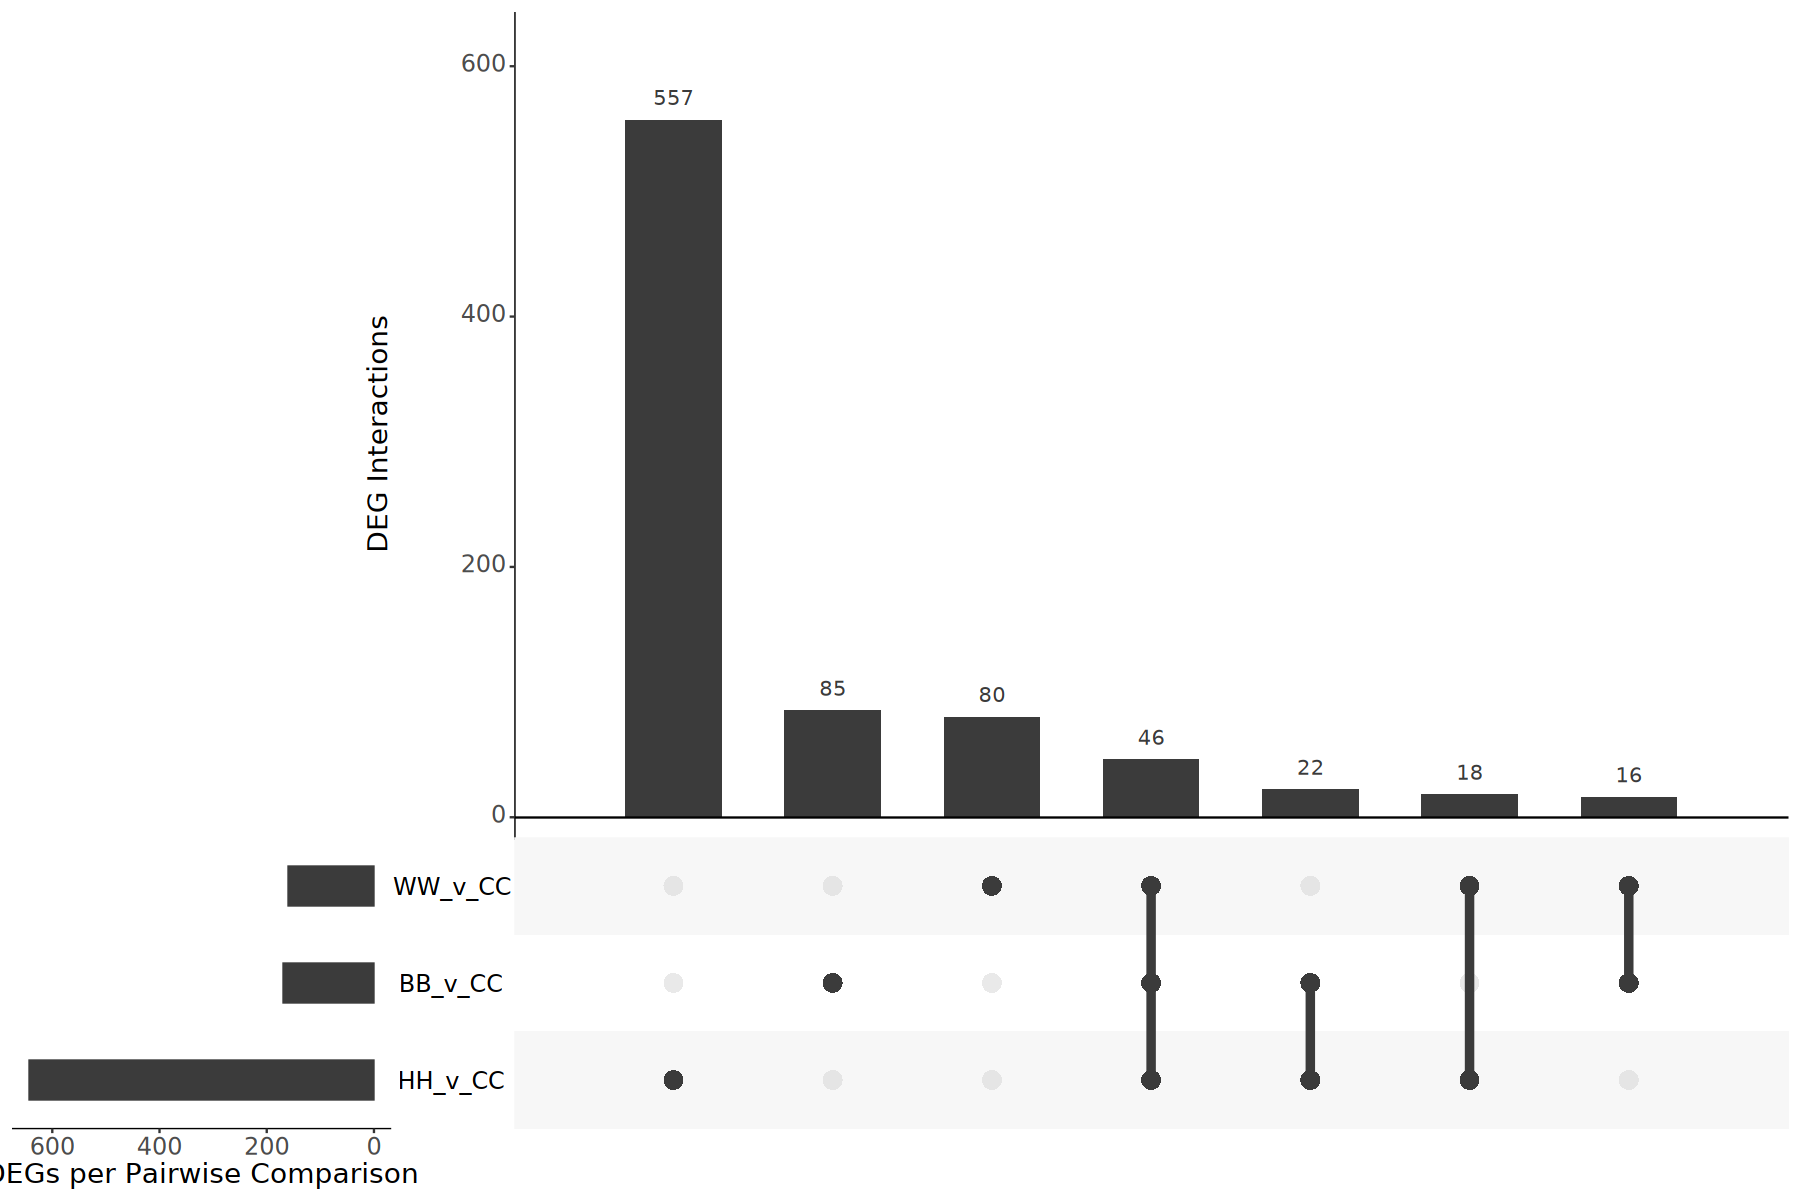

In [18]:
options(repr.plot.width=15, repr.plot.height=10)

comp4.upset <- upset(fromList(comp4), nsets = 6,, order.by='freq', point.size = 5, line.size = 2,
    mainbar.y.label = "DEG Interactions", sets.x.label = "DEGs per Pairwise Comparison", 
    text.scale = c(2, 2, 2, 2, 2, 2))

comp4.upset

Interesting that HH vs. CC elicits the most DEGs (in past comparisons, hypoxia has had the least amount of DEGs and both has had the most)

## 3. Upset plots *between* comparison groups

I'm curious if there's overlap in comparisons like CC vs. WC, CC vs. CW, and CC vs. WW - this should tell us strategies oysters use to deal with timing and repeated stressors

#### Warming against control oysters

In [9]:
# make list of dfs
warm = list(WW_v_CC = deg_list$ww_cc$X,
         WC_v_CC = deg_list$wc_cc$X,
         CW_v_CC = deg_list$cw_cc$X)

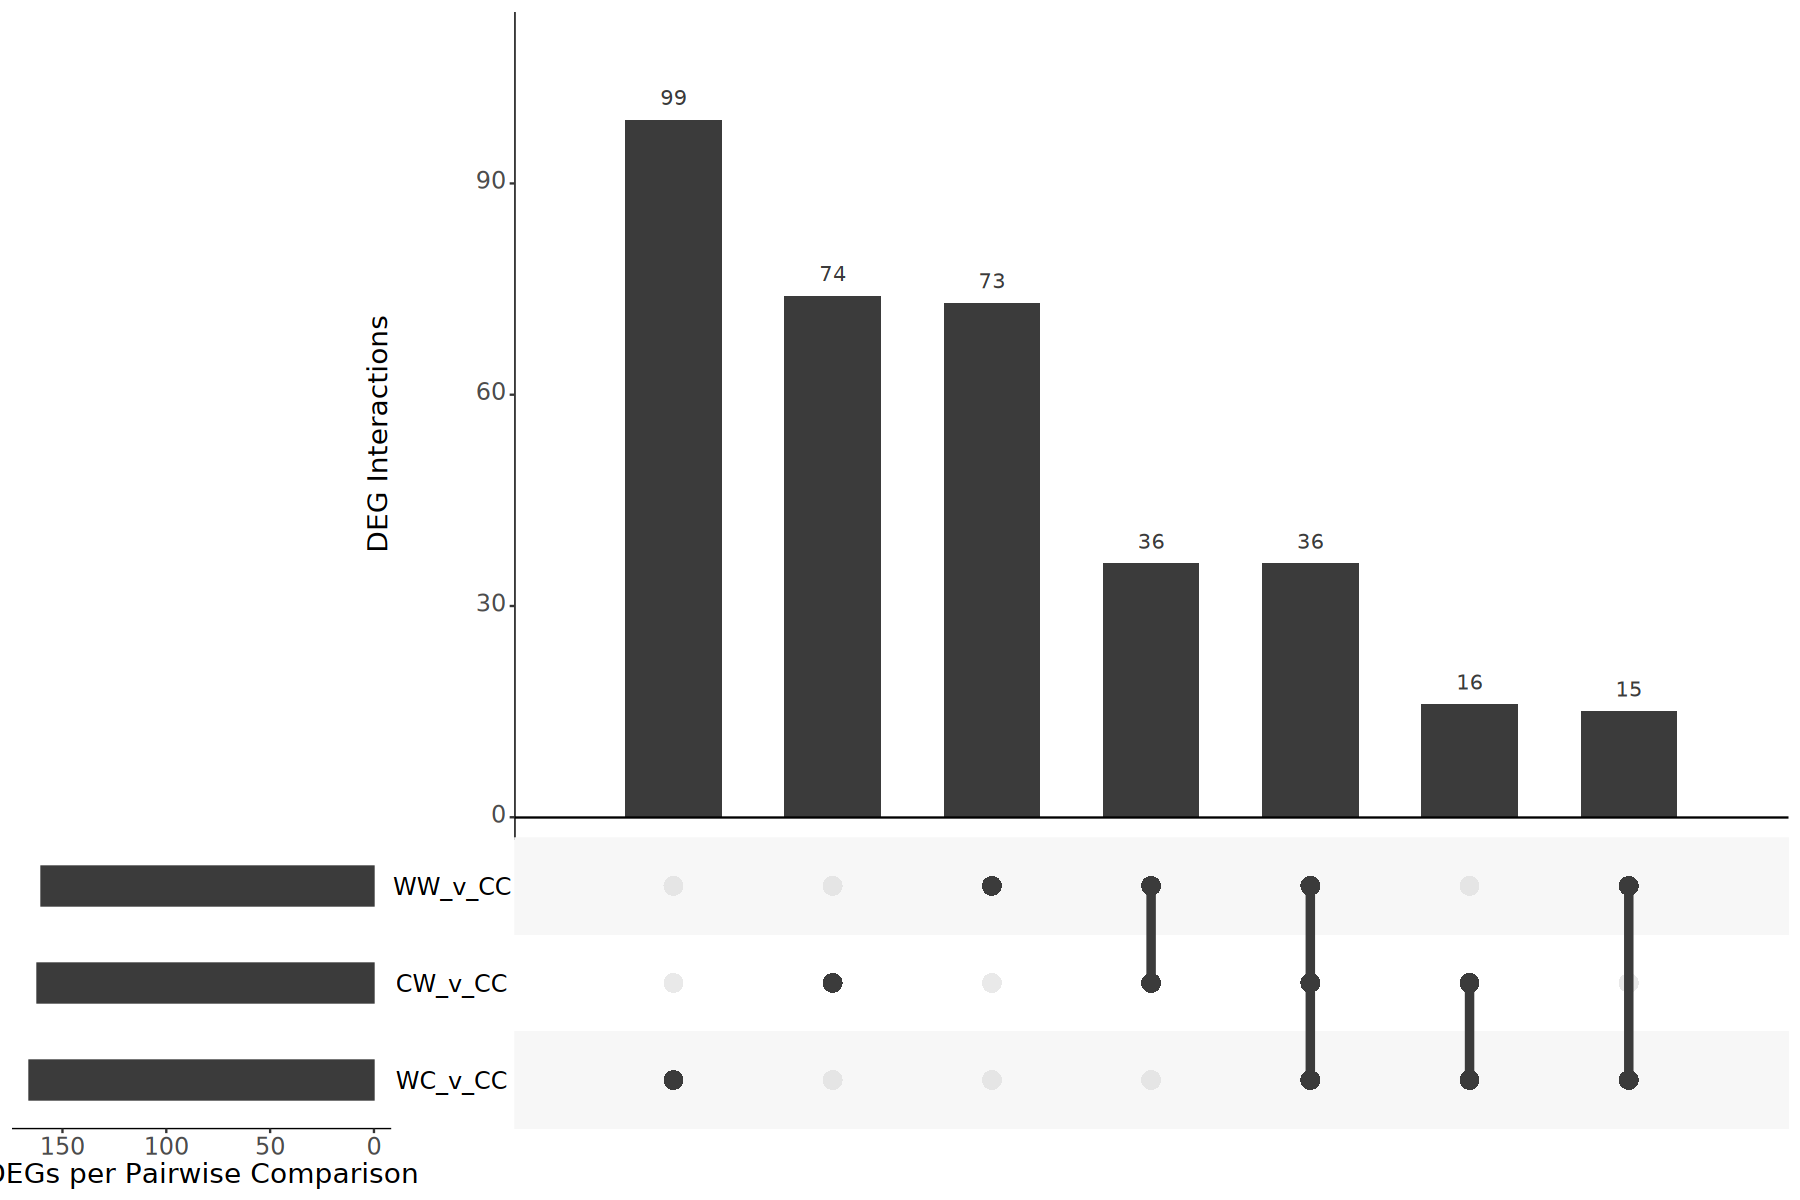

In [18]:
options(repr.plot.width=15, repr.plot.height=10)

warm.upset <- upset(fromList(warm), nsets = 6,, order.by='freq', point.size = 5, line.size = 2,
    mainbar.y.label = "DEG Interactions", sets.x.label = "DEGs per Pairwise Comparison", 
    text.scale = c(2, 2, 2, 2, 2, 2))

warm.upset

it's interesting that all three comparisons have roughly the same number of DEGs, but the majority are unique to that comparison - I wonder if there's functional redundancy

In [21]:
pdf('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/plots/warming_upset.pdf', width = 15, height = 10)
warm.upset
dev.off()

png 
  2

#### Hypoxia against control oysters

In [12]:
# make list of dfs
hypoxia = list(HH_v_CC = deg_list$hh_cc$X,
         HC_v_CC = deg_list$hc_cc$X,
         CH_v_CC = deg_list$ch_cc$X)

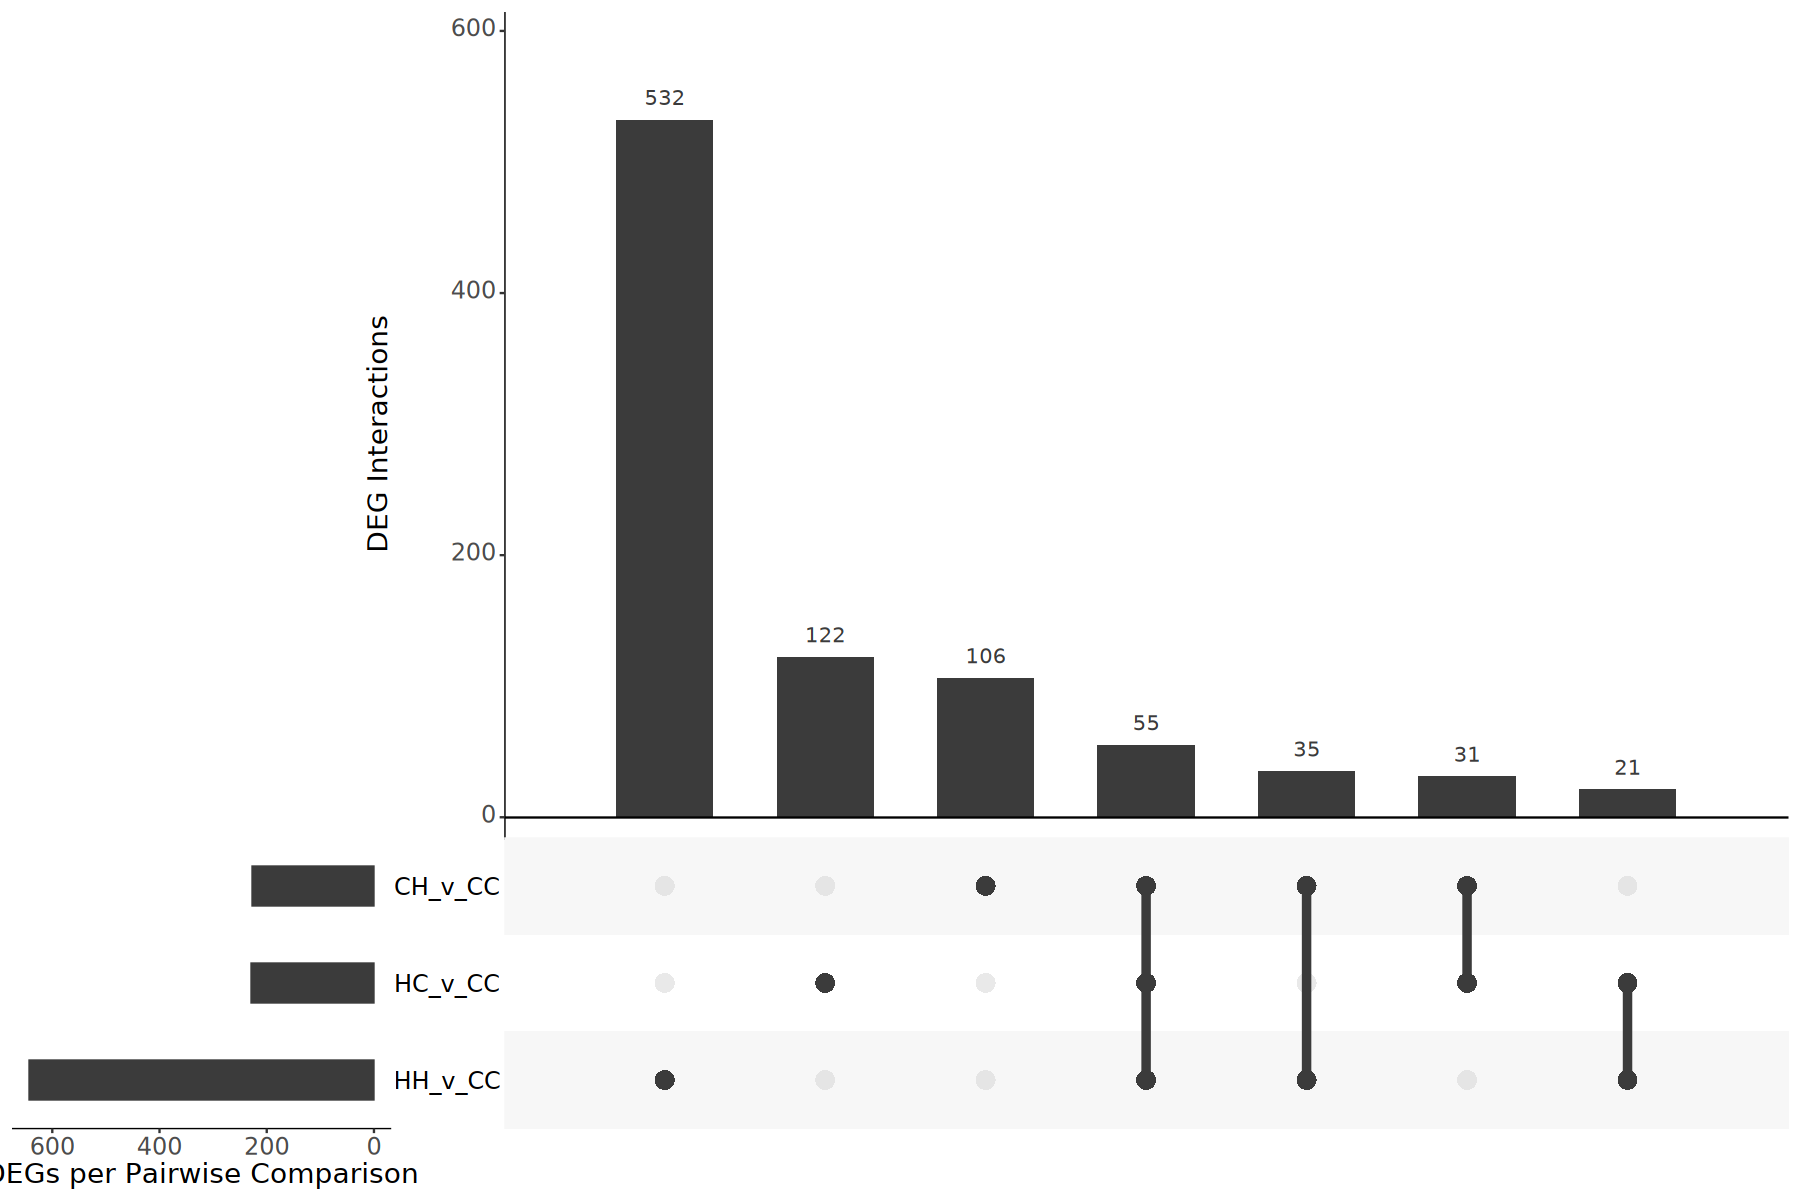

In [13]:
options(repr.plot.width=15, repr.plot.height=10)

hypoxia.upset <- upset(fromList(hypoxia), nsets = 6,, order.by='freq', point.size = 5, line.size = 2,
    mainbar.y.label = "DEG Interactions", sets.x.label = "DEGs per Pairwise Comparison", 
    text.scale = c(2, 2, 2, 2, 2, 2))

hypoxia.upset

In [22]:
pdf('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/plots/hypoxia_upset.pdf', width = 15, height = 10)
hypoxia.upset
dev.off()

png 
  2

#### Both warming and hypoxia against control oysters

In [14]:
# make list of dfs
both = list(BB_v_CC = deg_list$bb_cc$X,
         BC_v_CC = deg_list$bc_cc$X,
         CB_v_CC = deg_list$cb_cc$X)

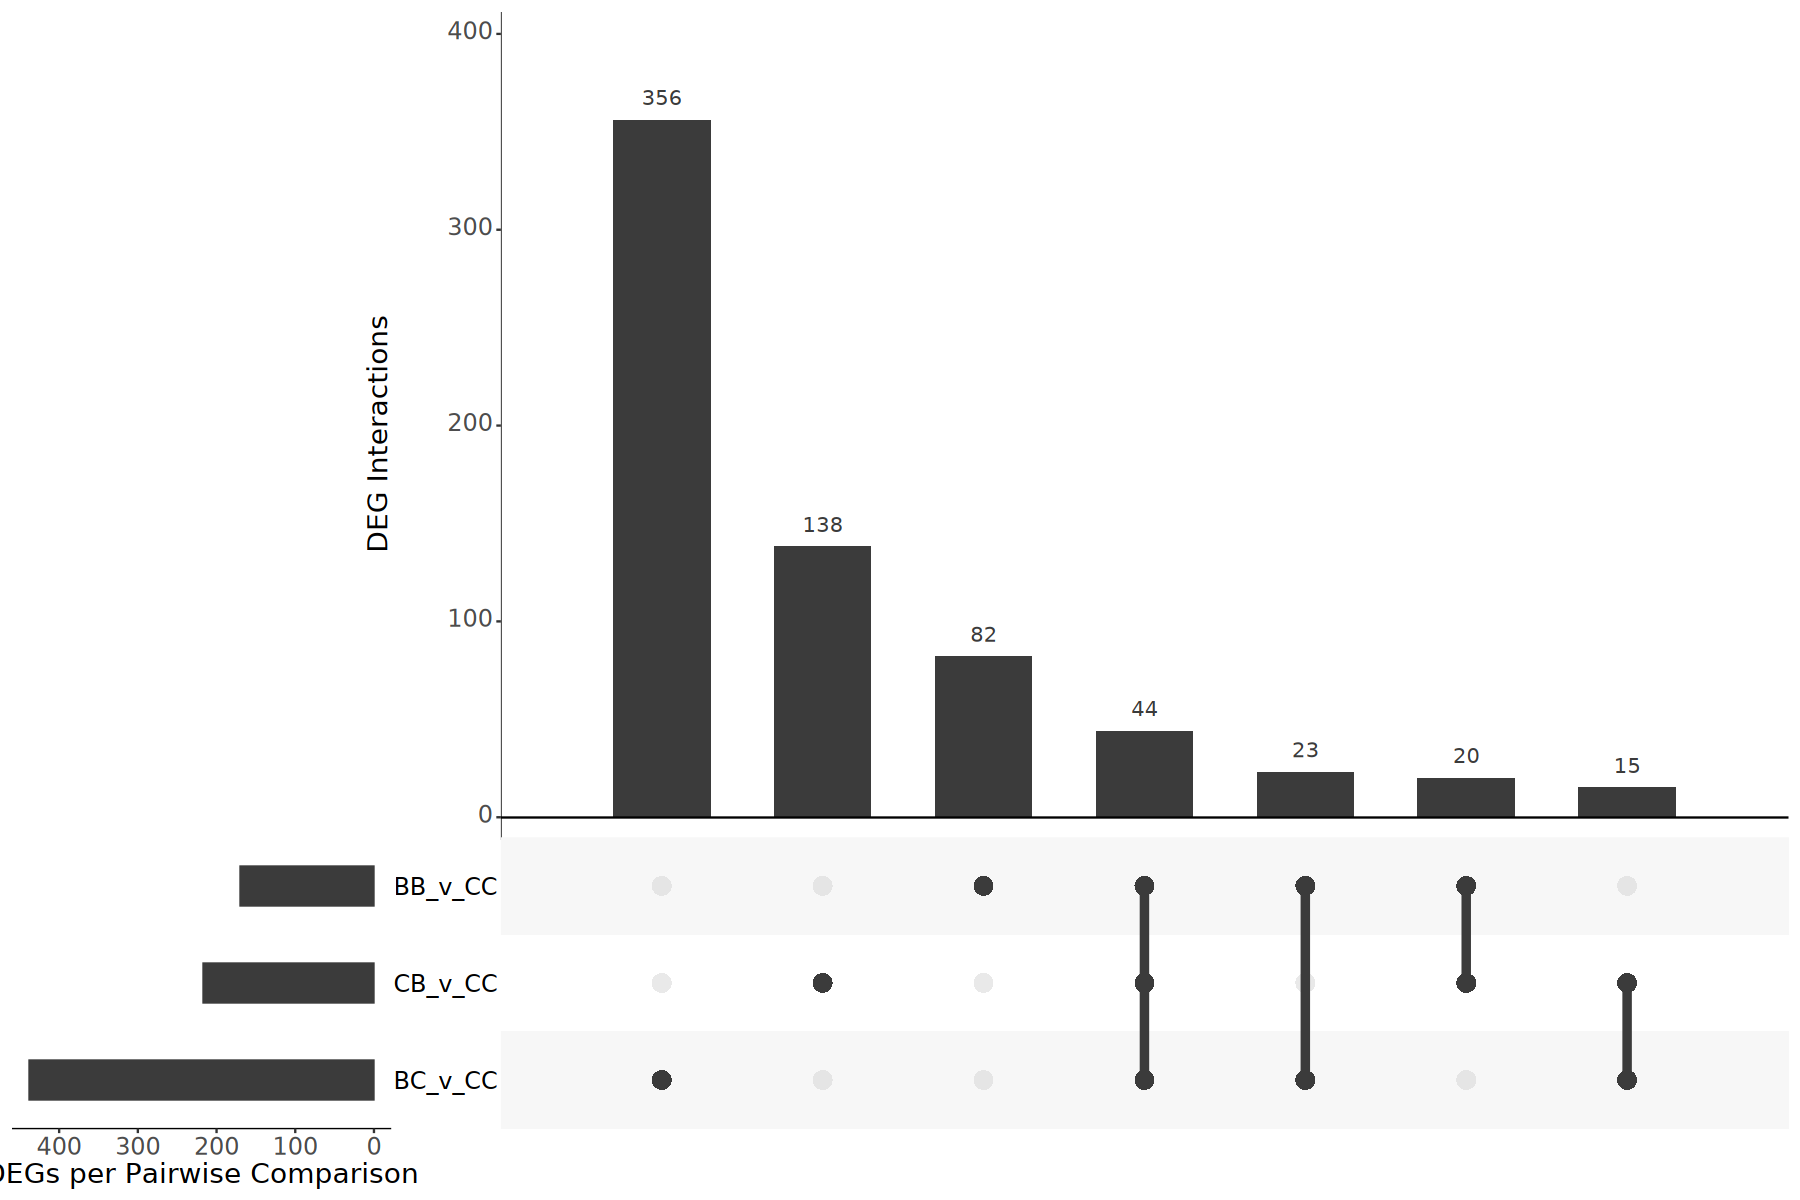

In [15]:
options(repr.plot.width=15, repr.plot.height=10)

both.upset <- upset(fromList(both), nsets = 6,, order.by='freq', point.size = 5, line.size = 2,
    mainbar.y.label = "DEG Interactions", sets.x.label = "DEGs per Pairwise Comparison", 
    text.scale = c(2, 2, 2, 2, 2, 2))

both.upset

In [23]:
pdf('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/plots/both_upset.pdf', width = 15, height = 10)
both.upset
dev.off()

png 
  2